<a href="https://colab.research.google.com/github/Upashanakhargharia/DeepLearningForAudioWithPython/blob/master/assamese.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from IPython.display import HTML
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav
import scipy
from python_speech_features.base import mfcc
from python_speech_features import logfbank

In [3]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout, LSTM
from keras.layers import Conv2D, MaxPooling2D, GlobalMaxPooling2D
from keras.optimizers import SGD
import os

In [4]:
pip install python_speech_features

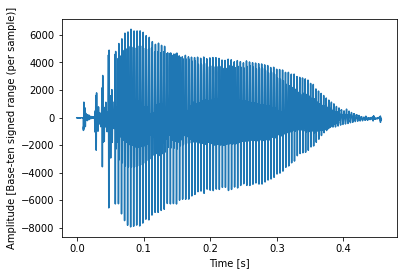

In [5]:
(rate,sig1) = wav.read("/content/Sound/অ (1).wav")
N = sig1.shape[0]
L = N / rate
f, ax = plt.subplots()
ax.plot(np.arange(N) / rate, sig1)
ax.set_xlabel("Time [s]")
ax.set_ylabel("Amplitude [Base-ten signed range (per sample)]");

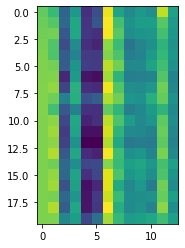

In [6]:
mfcc_feat = mfcc(sig1,rate,nfft=512)
plt.imshow(mfcc_feat[0:20,:])

In [7]:
soundfile = os.listdir("/content/Sound/")
data=[]
for i in soundfile:
  (rate,sig) = wav.read("/content/Sound/"+i)
  data.append(sig)

In [8]:
#set the independent var
size = 48
df=[]
for i in range(len(data)):
  mfcc_feat = mfcc(data[i],rate,nfft=512)
  mfcc_feat = np.resize(mfcc_feat, (size,13))
  mfcc_feat= pd.DataFrame(mfcc_feat)
  df.append(mfcc_feat)
  X = np.array(df)

In [9]:
X

array([[[ 8.28699555e+00, -2.06568602e+01,  1.52038912e+00, ...,
         -2.09914826e+00,  3.40669080e+00,  5.00875528e+00],
        [ 8.19178613e+00, -2.68000837e+01, -3.70917864e-01, ...,
          1.63199860e+00,  9.69021290e+00,  1.19199820e+01],
        [ 8.23842174e+00, -2.65339435e+01,  1.80385765e+00, ...,
          1.54896234e+00,  9.30357762e+00,  8.17786907e+00],
        ...,
        [ 1.65647479e+01, -7.37946301e+00, -2.40114586e+01, ...,
         -2.11141992e+01, -1.28345155e+01, -1.95763067e+01],
        [ 1.61651965e+01, -6.67823073e-01, -2.27334885e+01, ...,
         -1.33517990e+01, -9.68249957e+00, -1.78271092e+01],
        [ 1.58848989e+01,  4.70850034e+00, -1.72991781e+01, ...,
         -1.46383636e+01, -5.38759738e+00, -9.25364871e+00]],

       [[ 8.11056909e+00, -2.70756739e+01,  4.40429336e-01, ...,
         -1.00215053e-01, -4.02232729e+00,  2.28495558e+00],
        [ 8.08862910e+00, -2.50007352e+01,  4.93493466e+00, ...,
         -5.54087556e+00, -5.57217086e

In [10]:
#set the target label
y = [i[0] for i in soundfile]
Y = pd.get_dummies(y)

In [11]:
y

['ঈ',
 'ঈ',
 'উ',
 'ঔ',
 'এ',
 'ই',
 'অ',
 'ঐ',
 'ঔ',
 'উ',
 'ঋ',
 'এ',
 'ও',
 'এ',
 'ঈ',
 'ঐ',
 'ঋ',
 'ঊ',
 'ঊ',
 'ঐ',
 'ঊ',
 'ও',
 'আ',
 'ঔ',
 'ঐ',
 'ঈ',
 'ঋ',
 'অ',
 'অ',
 'ঈ',
 'ঈ',
 'উ',
 'ও',
 'অ',
 'ও',
 'ঈ',
 'ঋ',
 'ঔ',
 'আ',
 'ঐ',
 'ঈ',
 'ঋ',
 'ও',
 'ঔ',
 'ঐ',
 'ঊ',
 'উ',
 'আ',
 'এ',
 'ঋ',
 'ই',
 'আ',
 'উ',
 'ও',
 'ই',
 'এ',
 'উ',
 'ঋ',
 'ঐ',
 'এ',
 'ই',
 'ঈ',
 'আ',
 'ই',
 'ঔ',
 'উ',
 'আ',
 'ই',
 'এ',
 'এ',
 'এ',
 'ঈ',
 'ঊ',
 'ও',
 'অ',
 'ঊ',
 'অ',
 'ও',
 'আ',
 'ঋ',
 'ঊ',
 'উ',
 'ঐ',
 'এ',
 'ও',
 'অ',
 'উ',
 'আ',
 'উ',
 'ই',
 'ই',
 'ঋ',
 'অ',
 'ঈ',
 'ঋ',
 'আ',
 'ঔ',
 'এ',
 'ই',
 'ঔ',
 'আ',
 'ঋ',
 'অ',
 'অ',
 'ও',
 'ঊ',
 'আ',
 'অ',
 'আ',
 'আ',
 'উ',
 'উ',
 'ঈ',
 'এ',
 'ঐ',
 'ঋ',
 'ঔ',
 'ঔ',
 'ঔ',
 'ঋ',
 'অ',
 'আ',
 'ঊ',
 'ঋ',
 'ই',
 'ঈ',
 'ঔ',
 'ঐ',
 'অ',
 'ঋ',
 'এ',
 'ঋ',
 'অ',
 'ঋ',
 'ঊ',
 'অ',
 'অ',
 'ঈ',
 'ঐ',
 'ঔ',
 'আ',
 'ই',
 'অ',
 'অ',
 'অ',
 'ও',
 'ও',
 'ঋ',
 'ঊ',
 'উ',
 'ও',
 'এ',
 'আ',
 'ঈ',
 'ঋ',
 'উ',
 'অ',
 'আ',
 'ও',
 'ঔ',
 'ঈ',
 'উ',
 'ঊ',
 'এ',
 'ও',
 'ই',
 'এ'

In [12]:
Y

,অ,আ,ই,ঈ,উ,ঊ,ঋ,এ,ঐ,ও,ঔ
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
437,0,1,0,0,0,0,0,0,0,0,0
438,0,1,0,0,0,0,0,0,0,0,0
439,1,0,0,0,0,0,0,0,0,0,0
440,0,0,0,0,1,0,0,0,0,0,0


In [13]:
print(Y[0:3])

   অ  আ  ই  ঈ  উ  ঊ  ঋ  এ  ঐ  ও  ঔ
0  0  0  0  1  0  0  0  0  0  0  0
1  0  0  0  1  0  0  0  0  0  0  0
2  0  0  0  0  1  0  0  0  0  0  0


In [14]:
Y = np.array(Y)

In [15]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [16]:
print(X.shape)

(442, 48, 13)


In [17]:
model = Sequential()

In [18]:
#Convolution layers
model.add(Conv2D(11, (3, 3), activation="relu", input_shape=(size, 13,1)))
model.add(Conv2D(11, (3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.1))

In [19]:
#Flattening
model.add(Flatten(input_shape=(size, 13,1)))

In [20]:
#1st fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.16))
model.add(Activation("relu"))

In [21]:
#2nd fully connected Neural Network hidden-layer
model.add(Dense(64))
model.add(Dropout(0.12))
model.add(Activation("relu"))

In [22]:
#Output layer
model.add(Dense(11))
model.add(Activation("softmax"))


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 46, 11, 11)        110       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 44, 9, 11)         1100      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 22, 4, 11)         0         
_________________________________________________________________
dropout (Dropout)            (None, 22, 4, 11)         0         
_________________________________________________________________
flatten (Flatten)            (None, 968)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                62016     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0

In [24]:
sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss="binary_crossentropy",
optimizer=sgd,
metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [25]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)
x_train = x_train.reshape(-1, size, 13, 1)
x_test = x_test.reshape(-1, size, 13, 1)

In [26]:
history = model.fit(
x_train,
y_train,
epochs=50,
batch_size=32,
validation_split=0.2,
shuffle=True
)


Epoch 1/50
9/9 [==============================] - 18s 108ms/step - loss: 1.6068 - accuracy: 0.1057 - val_loss: 0.3134 - val_accuracy: 0.2090
Epoch 2/50
9/9 [==============================] - 0s 9ms/step - loss: 0.3363 - accuracy: 0.1744 - val_loss: 0.2741 - val_accuracy: 0.3284
Epoch 3/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2913 - accuracy: 0.2884 - val_loss: 0.2497 - val_accuracy: 0.4627
Epoch 4/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2727 - accuracy: 0.3279 - val_loss: 0.2302 - val_accuracy: 0.3433
Epoch 5/50
9/9 [==============================] - 0s 9ms/step - loss: 0.2578 - accuracy: 0.3306 - val_loss: 0.2079 - val_accuracy: 0.5075
Epoch 6/50
9/9 [==============================] - 0s 10ms/step - loss: 0.2296 - accuracy: 0.4474 - val_loss: 0.1881 - val_accuracy: 0.4627
Epoch 7/50
9/9 [==============================] - 0s 8ms/step - loss: 0.2046 - accuracy: 0.5162 - val_loss: 0.1687 - val_accuracy: 0.5672
Epoch 8/50
9/9 [==============

In [27]:
mo=model.evaluate(x_test, y_test, verbose=2)
mo


4/4 - 0s - loss: 0.0053 - accuracy: 0.9820


[0.005292493384331465, 0.9819819927215576]

4/4 - 0s - loss: 0.0053 - accuracy: 0.9820


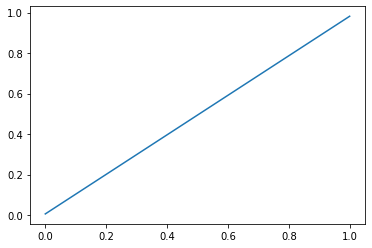

In [28]:
plt.plot(model.evaluate(x_test, y_test, verbose=2))

In [29]:
'''Print the sound to be predicted
sound_index = 17
y_test[sound_index]'''

'Print the sound to be predicted\nsound_index = 17\ny_test[sound_index]'

In [30]:
'''pred = model.predict(x_test[sound_index].reshape(-1,size,13,1))'''



'pred = model.predict(x_test[sound_index].reshape(-1,size,13,1))'

In [31]:
'''print("\n\033[1mPredicted letter sound: %.0f"%pred.argmax(),"\033[0m \n ")
print("Predicted probability array:")
print(pred)'''

'print("\n\x1bPredicted letter sound: %.0f"%pred.argmax(),"\x1b \n ")\nprint("Predicted probability array:")\nprint(pred)'

In [32]:
def func_sound(ind):
  print (y_test[ind])
  pred1= model.predict(x_test[ind].reshape(-1,size,13,1))
  if (pred1.argmax()==0):
    print("the letter is অ ")
  elif (pred1.argmax()==1):
    print("the letter is আ ")
  elif (pred1.argmax()==2):
    print("the letter is ই	")
  elif (pred1.argmax()==3):
    print("the letter is ঈ ")
  elif (pred1.argmax()==4):
    print("the letter is উ") 
  elif (pred1.argmax()==5):
    print("the letter is ঊ ")
  elif (pred1.argmax()==6):
    print("the letter is ঋ")
  elif (pred1.argmax()==7):
    print("the letter is এ") 
  elif (pred1.argmax()==8):
    print("the letter is ঐ") 
  elif (pred1.argmax()==9):
    print("the letter is ও ") 
  elif (pred1.argmax()== 10):
     print("the letter is ঔ ")
  else: print("not recognised")
  



In [33]:
func_sound(3)
  

[0 0 0 0 0 0 1 0 0 0 0]
the letter is ঋ


In [34]:
func_sound(77)

[0 0 0 0 0 0 0 0 0 0 1]
the letter is ঔ 


In [35]:
func_sound(8)

[0 0 0 0 0 0 1 0 0 0 0]
the letter is ঋ


In [36]:
func_sound(2)

[0 0 0 0 1 0 0 0 0 0 0]
the letter is ঊ 


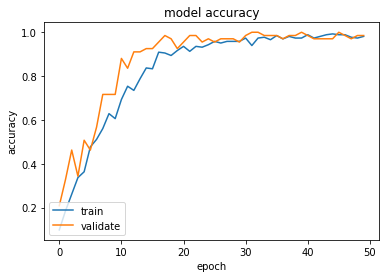

In [37]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuracy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','validate'],loc='lower left')
plt.show()

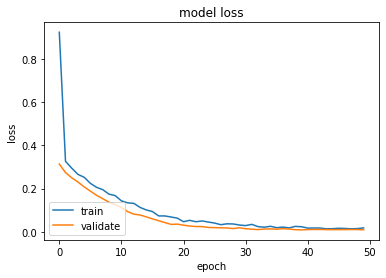

In [38]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','validate'],loc='lower left')
plt.show()

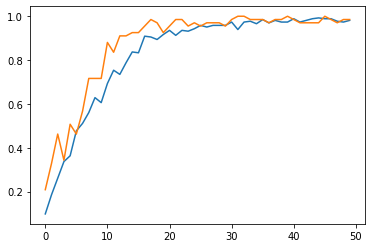

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])


In [3]:
func_sound([5])

NameError: ignored